# Report on U.N. World Happiness Data
Github Link: https://github.com/soobino/adv_machine_learning

*   QMSS 5074
*   Advanced Machine Learning 
*  Spring 2023

In [3]:
#install aimodelshare library
! pip install aimodelshare --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.0/967.0 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.3/442.3 KB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 KB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 KB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━

## Import Data

In [4]:
# Upload world happiness competition data zip into the environment (refreshes every run time)!

# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

## 1. Explore bivariate results (Use visualizations!)
**Describe any relationships you see between particular features and the target variable**

We observed that Social Support has the highest correlation to our target variable (Level of Happiness). GDP per Capita and Healthy Life Expectancy also show some sign of correlation. Perception of corruption is pretty stable at < 0.2 except for within the Very High category, which stands out. Number of terrorist attack is also generally stable at < 500 but Very Low category stands out with outliers with 1000-6000. 

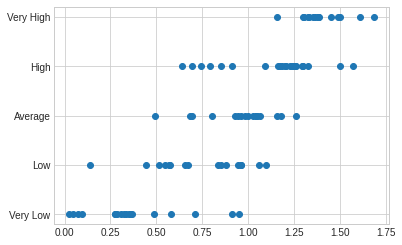

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

datamap = {'Very Low':1,'Low':2,'Average':3, 'High':4, 'Very High': 5}
y_num = list(map(lambda x: datamap[x], y_train_labels))

plt.plot(X_train['GDP per capita'], y_num,'o')
plt.yticks([1,2,3,4,5], datamap)
plt.show()
    

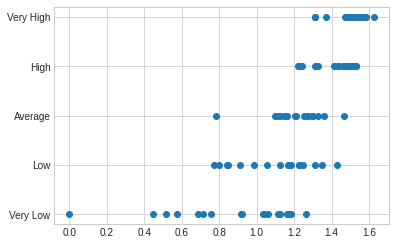

In [ ]:
plt.plot(X_train['Social support'], y_num,'o')
plt.yticks([1,2,3,4,5], datamap)
plt.show()

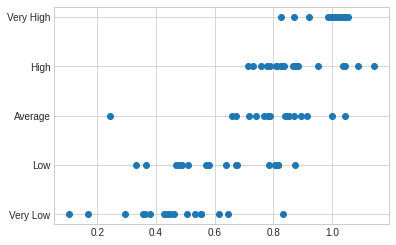

In [ ]:
plt.plot(X_train['Healthy life expectancy'], y_num,'o')
plt.yticks([1,2,3,4,5], datamap)
plt.show()

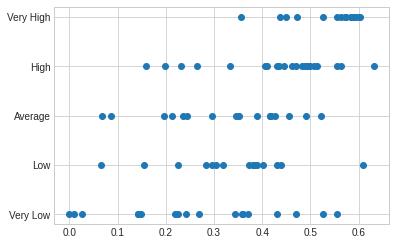

In [ ]:
plt.plot(X_train['Freedom to make life choices'], y_num,'o')
plt.yticks([1,2,3,4,5], datamap)
plt.show() 

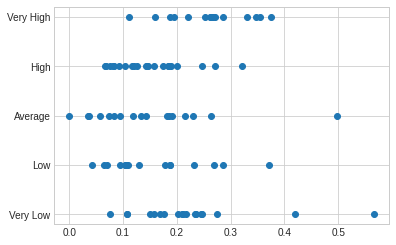

In [ ]:
plt.plot(X_train['Generosity'], y_num,'o')
plt.yticks([1,2,3,4,5], datamap)
plt.show()

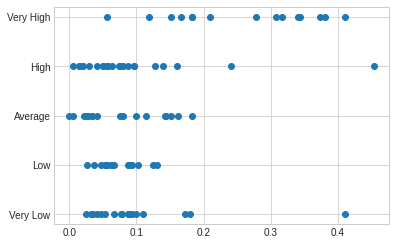

In [ ]:
plt.plot(X_train['Perceptions of corruption'], y_num,'o')
plt.yticks([1,2,3,4,5], datamap)
plt.show()

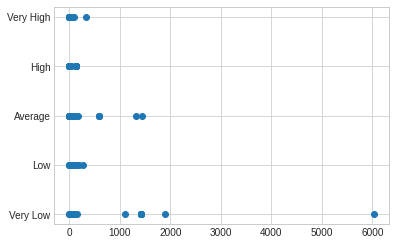

In [ ]:
plt.plot(X_train['Terrorist_attacks'], y_num,'o')
plt.yticks([1,2,3,4,5], datamap)
plt.show()

## 2. Examine features that predict happiness categories using one or more models that allow for automatic feature selection
**Explain any meaningful findings**


We use permutation importance to examine the features that can predict happiness categories. From the this, we see that GDP per Capita is the most important with the highest contribution to accurcy score. Then, it is followed by Healthy Life Expectancy and Social Support, which is in line with our observations from the bivariate analyses. 

### Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

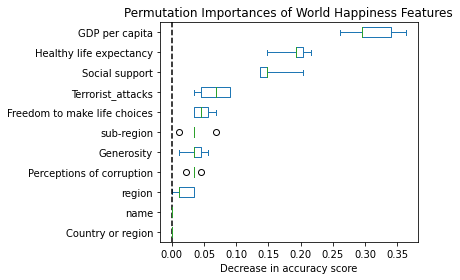

In [12]:
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([
    ('preprocess', preprocess),
    # put your model below
    ('classifier', RandomForestClassifier(random_state=42))
])

rf.fit(X_train, y_train)

result = permutation_importance(rf, X_train, y_train)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances of World Happiness Features")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

## 3. Experiment with different prediction models to try to predict World Happiness well (Fit and compare, at minimum, three models)
**Discuss which models you tried and which models performed better and point out relevant hyper-parameter values for successful models.**

I used GridSearch CV to find the best hyper parameters to tune my Random Forest, Gradient Boosting, and K Nearest Neighbor models. Best mean cross-validation scores came from Gradient Boosting with 0.683 when tuned with learning rate of 1.0, max depth of 7, max feature as sqrt, and number of estimator as 10. It was closely followed by Random Forest with mean cross validation score of 0.672 when tuned with max depth of 10, max feature as auto, and number of estimators as 10. K nearest neighbor had relatively lower mean cross validation score of 0.521.


### Fit and Tune Models 


In [25]:
# Grid Search CV - Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


param_grid = {'n_estimators': np.arange(10, 50),'max_depth':[1, 3, 5, 7, 10], 'max_features': ['sqrt','log2','auto',None]} 

rf_gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

rf_gridmodel.fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(rf_gridmodel.best_score_))
print("best parameters: {}".format(rf_gridmodel.best_params_))


best mean cross-validation score: 0.672
best parameters: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 10}


In [23]:
# Grid Search CV - KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


param_grid = {'n_neighbors': np.arange(2, 10)} 

kn_gridmodel = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)

kn_gridmodel.fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(kn_gridmodel.best_score_))
print("best parameters: {}".format(kn_gridmodel.best_params_))

best mean cross-validation score: 0.521
best parameters: {'n_neighbors': 2}


In [26]:
# Grid Search CV - Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


param_grid = {'n_estimators': np.arange(10, 50),'max_depth':[1, 3, 5, 7, 10], 'learning_rate':[1.0,5.0,10.0],'max_features': ['sqrt','log2','auto',None]} 

gb_gridmodel = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, cv=10)

gb_gridmodel.fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(gb_gridmodel.best_score_))
print("best parameters: {}".format(gb_gridmodel.best_params_))

best mean cross-validation score: 0.683
best parameters: {'learning_rate': 1.0, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 10}


### Iterate More and Select Best Models

My teammates also observed best performances in Random Forest and Gradient Boosting models as well, although our hyperparameters varied in terms of max depth, max features, and n estimators. I revised my range of n_estimators to be higher (50 vs. 100). For Random Forest, my model went from 0.672 to 0.749. For Gradient Boosting, my model went from 0.683 to 636, which is lower than before. For K-Nearest Neighbor, the accuracy improved to 0.564 from 0.521 when the ranged of N_neighbor decreased. 


In [46]:
# Grid Search CV - Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


param_grid = {'n_estimators': np.arange(10, 100),'max_depth':[1, 3, 5, 7, 10], 'max_features': ['sqrt','log2','auto',None]} 

rf_gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

rf_gridmodel.fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(rf_gridmodel.best_score_))
print("best parameters: {}".format(rf_gridmodel.best_params_))


best mean cross-validation score: 0.749
best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 41}


In [54]:
# Grid Search CV - KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


param_grid = {'n_neighbors': np.arange(2, 5)} 

kn_gridmodel = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)

kn_gridmodel.fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(kn_gridmodel.best_score_))
print("best parameters: {}".format(kn_gridmodel.best_params_))

best mean cross-validation score: 0.564
best parameters: {'n_neighbors': 3}


In [60]:
# Grid Search CV - Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


param_grid = {'n_estimators': np.arange(10,100),'max_depth':[1, 5]} 

gb_gridmodel = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, cv=10)

gb_gridmodel.fit(preprocessor(X_train), y_train_labels)

print("best mean cross-validation score: {:.3f}".format(gb_gridmodel.best_score_))
print("best parameters: {}".format(gb_gridmodel.best_params_))

best mean cross-validation score: 0.636
best parameters: {'max_depth': 1, 'n_estimators': 41}


### Save Models

In [33]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


In [32]:
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

In [50]:
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(rf_gridmodel, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("rf_gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [37]:
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(gb_gridmodel, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gb_gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  


In [38]:
from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(kn_gridmodel, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("kn_gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

### Submit models on AI ModelShare


My best models were 
* Random Forest with {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 41}
* Gradient Boosting with  {'learning_rate': 1.0, 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 10}
* K Nearest Neighbor with {'n_neighbors': 3}


In [40]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [41]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [43]:
# Submit gradient_model_final 

#-- Generate predicted values (Model 1)
prediction_labels = gb_gridmodel.predict(preprocessor(X_test))

# Submit Model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "gb_gridmodel.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                  custom_metadata = {"team":"4"})

Insert search tags to help users find your model (optional): GB_Final
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 694

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [51]:
# Submit random_forest_model_final 

#-- Generate predicted values (Model 1)
prediction_labels = rf_gridmodel.predict(preprocessor(X_test))

# Submit Model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "rf_gridmodel.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                  custom_metadata = {"team":"4"})

Insert search tags to help users find your model (optional): RF_Final
Provide any useful notes about your model (optional): updated N_Estimators

Your model has been submitted as model version 758

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [56]:
# Submit knn_model_final 

#-- Generate predicted values (Model 1)
prediction_labels = kn_gridmodel.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "kn_gridmodel.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                  custom_metadata = {"team":"4"})

Insert search tags to help users find your model (optional): KN_Final
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 763

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164
